# Picture processing when received


* extract colours (paleta picture)
* extract colours elements (maybe contours) and from those, isolate elements (lst of elements)
* for the same colour elements:
    * check wether some elements can be grouped as one element (same bruch stroke) or not, identify same stroke elements probabilities from skeletonize??
    * isolate identified distinct elements again 
    
   

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

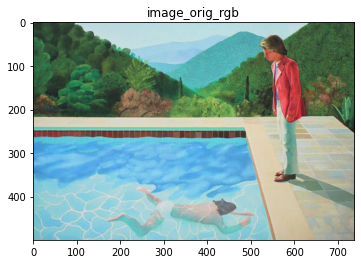

In [2]:
path="./data/tmp/"
nameInFile="tmp_resize_image.jpg"

image = cv2.imread(path + nameInFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("image_orig_rgb")
plt.show()

## notas: 
https://realpython.com/image-processing-with-the-python-pillow-library/

In [3]:
from PIL import   Image, ImageFilter, ImageOps

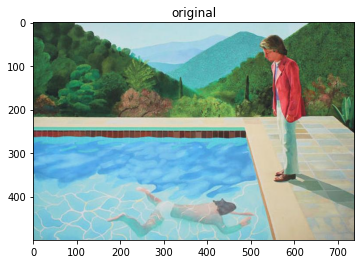

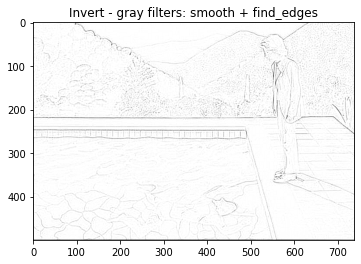

In [4]:
# extraer los contornos del dibujo_______ 'esbozo'

nameInFile="./data/tmp/tmp_resize_image.jpg"
#with Image.open(nameInFile) as img:
#    img.load()
img=  Image.open(nameInFile)  

plt.imshow(img)
plt.title('original')
plt.show()

img_gray = img.convert("L")
#plt.imshow(img_gray, cmap='gray')
#plt.title('gray')
#plt.show()

##img_gray_edges = img_gray.filter(ImageFilter.FIND_EDGES)
##img_gray_edges.show()

##inverted_image1 = ImageOps.invert(img_gray_edges)
##inverted_image1.show()

img_gray_smooth = img_gray.filter(ImageFilter.SMOOTH)
#plt.imshow(img_gray_smooth, cmap='gray')
#plt.title('gray filter: smooth')
#plt.show()

img_gray_smooth_edges = img_gray_smooth.filter(ImageFilter.FIND_EDGES)
#plt.imshow(img_gray_smooth_edges, cmap='gray')
#plt.title('gray filters: smooth + find_edges')
#plt.show()
##img_gray_smooth_edges.show()


pil_img_lines = ImageOps.invert(img_gray_smooth_edges)
#pil_img_lines.show()
plt.imshow(pil_img_lines, cmap='gray')
plt.title('Invert - gray filters: smooth + find_edges') # so far the best selection for output
plt.show()


#type(pil_img_lines)
#tmp_img_lines= np.array(pil_img_lines)

#type(tmp_img_lines)
#plt.imshow(tmp_img_lines, cmap='gray')
#plt.title('array_Invert - gray filters: smooth + find_edges')
#plt.show()

#kernel = np.ones((2, 2), np.uint8)
#tmp_img_lines_erosion = cv2.erode(tmp_img_lines, kernel, iterations=1)
#plt.imshow(tmp_img_lines_erosion, cmap='gray')
#plt.title('Erosion on array_Invert - gray filters: smooth + find_edges')
#plt.show()

#tmp_img_lines_dilate = cv2.dilate(tmp_img_lines_erosion, kernel, iterations=1)
#plt.imshow(tmp_img_lines_dilate, cmap='gray')
#plt.title('Dilatation + Erosion on array_Invert - gray filters: smooth + find_edges')
#plt.show()


In [8]:
type(image)

numpy.ndarray

In [12]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

/tmp/ipykernel_11387/1253122710.py:11: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = slic(face_image, n_segments=n_segments)
/tmp/ipykernel_11387/1253122710.py:14: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  segmented_image = label2rgb(segments, face_image, kind='avg')


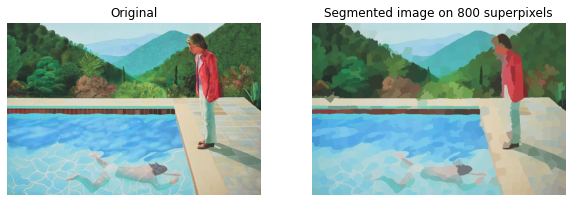

In [15]:
from skimage.segmentation import slic
from skimage.color import label2rgb

path="./data/tmp/"
nameInFile="tmp_resize_image.jpg"

face_image = plt.imread(path + nameInFile)/255

# Obtain the segmentation with 400 regions
n_segments=800
segments = slic(face_image, n_segments=n_segments)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')
   
    
plot_comparison(face_image, segmented_image, f'Segmented image on {n_segments} superpixels')

### Extract the colours

In [5]:
df_colours=pd.read_csv('./data/tmp/tmp_df_colours.csv')  

pd.set_option('display.max_rows', 500)
df_colours_min100=df_colours[df_colours['occurence'] >100]
print('num_colores total:',len(df_colours),'   num_colores con puntos>100:',len(df_colours_min100))
df_colours_min100

num_colores total: 206    num_colores con puntos>100: 83


R    G    B  occurence   c_code             c_name
0   186  221  227      55540  #BADDE3        ~powderblue
1    62   93   59      46217  #3E5D3B     ~darkslategray
2   215  201  172      40266  #D7C9AC            ~silver
3    94  177  231      35506  #5EB1E7    ~cornflowerblue
4   121  199  237      17966  #79C7ED           ~skyblue
5    39   57   45      17821  #27392D     ~darkslategray
6    82  177  181      17250  #52B1B5         ~cadetblue
7   138  205  214      13041  #8ACDD6           ~skyblue
8   181  180  160      12521  #B5B4A0          ~darkgray
9   162  208  231      10602  #A2D0E7         ~lightblue
10   49  107   67       9603  #316B43     ~darkslategray
11  208  193  186       9559  #D0C1BA            ~silver
12   81  121   61       6726  #51793D    ~darkolivegreen
13  112   98   71       6005  #706247           ~dimgray
14  105  127  114       4741  #697F72           ~dimgray
15  160  182  179       3828  #A0B6B3          ~darkgray
16  186   51   57       3727  #BA3339             ~brown
17  103  146   75       3644  #67924B         ~olivedrab
18   90  201  220       3503  #5AC9DC   ~mediumturquoise
19  108  206  181       3388  #6CCEB5  ~mediumaquamarine
20  132  153  138       3097  #84998A    ~lightslategray
21   61   52   45       3062  #3D342D     ~darkslategray
22   45   73   50       2451  #2D4932     ~darkslategray
23  212  215  198       2006  #D4D7C6         ~lightgray
24   83   77   51       1995  #534D33    ~darkolivegreen
25   89  108   62       1902  #596C3E    ~darkolivegreen
26  138   90   76       1877  #8A5A4C            ~sienna
27   96   47   43       1873  #602F2B       ~saddlebrown
28   85  151  137       1859  #559789         ~cadetblue
29  100   74   51       1591  #644A33    ~darkolivegreen
30   77  150   79       1522  #4D964F          ~seagreen
31  123  173   86       1302  #7BAD56       ~yellowgreen
32  134   50   50       1254  #863232             ~brown
33   50  123   70       1236  #327B46          ~seagreen
34  115  114  120       1231  #737278           ~dimgray
35  230   85   92       1231  #E6555C         ~indianred
36  145   77   64       1105  #914D40            ~sienna
37  134  120   83        996  #867853           ~dimgray
38  183  217  192        874  #B7D9C0            ~silver
39  186  162  126        843  #BAA27E         ~rosybrown
40  141  214  203        772  #8DD6CB           ~skyblue
41  153  113   87        735  #997157              ~gray
42   68  149  212        603  #4495D4         ~steelblue
43   88   59   53        577  #583B35    ~darkolivegreen
44  199  107   84        528  #C76B54         ~indianred
45  154   45   50        517  #9A2D32             ~brown
46  159  152  133        499  #9F9885         ~rosybrown
47   82  155  112        489  #529B70    ~mediumseagreen
48   83  132   87        468  #538457          ~seagreen
49  146  196  169        438  #92C4A9      ~darkseagreen
50  108  133  103        423  #6C8567           ~dimgray
51  129  184  181        394  #81B8B5  ~mediumaquamarine
52   75   76   70        390  #4B4C46     ~darkslategray
53  189  190  148        344  #BDBE94               ~tan
54   33   43   44        303  #212B2C     ~darkslategray
55   68  175  147        277  #44AF93         ~cadetblue
56  179  135   90        276  #B3875A              ~peru
57  195  166  150        252  #C3A696               ~tan
58  215  215  217        243  #D7D7D9         ~gainsboro
59  231  170  175        237  #E7AAAF         ~lightpink
60  134  171  127        236  #86AB7F      ~darkseagreen
61   62   96   79        229  #3E604F     ~darkslategray
62  151  157  157        220  #979D9D          ~darkgray
63  120   90   88        218  #785A58           ~dimgray
64  100  144  145        217  #649091         ~slategray
65  217  113  114        194  #D97172        ~lightcoral
66   79  173  209        190  #4FADD1   ~mediumturquoise
67   84  172   85        187  #54AC55    ~mediumseagreen
68  227  230  185        181  #E3E6B9     ~palegoldenrod
69  121  130   8

### Paleta de colores

In [6]:
#show the complete palette extracted (filtering)
def show_palette_from_df (df_input, ingroup=20):

    n_dec=int(len(df_input)/ingroup)
    if(len(df_input) % ingroup != 0):n_dec+=1
    #print(n_dec,len(df_colours))
    ini=0
    fin=ingroup

    for k in range(n_dec):
        if fin >len(df_input):
            fin2= min(len(df_input),fin)
            array10_palette=np.array([[df_input.R[k], df_input.G[k], df_input.B[k]]  for k in range(ini,fin2)])[np.newaxis, :, :]
            
            
            #for j in range(fin-len(df_colours)):
            arrayfin2_palette=np.array([[255, 255, 255]  for j in range(fin-len(df_input))])[np.newaxis, :, :]
            #print('fin:',fin,'palette:',arrayfin_palette)
            #print(arrayfin2_palette)
            array10_palette= np.concatenate((array10_palette, arrayfin2_palette), axis=1)
            #array10_palette=array10_palette + arrayfin2_palette
            #print(array10_palette.shape)
        else:
            array10_palette=np.array([[df_input.R[k], df_input.G[k], df_input.B[k]] for k in range(ini,fin)])[np.newaxis, :, :]
        plt.imshow(array10_palette)
        plt.axis('off')
        plt.show()
        ini+=ingroup
        fin+=ingroup

print('Palette complete:', len(df_colours), '  Dots:',sum(df_colours['occurence']))
show_palette_from_df(df_colours) 

print('Palette filtered (dots gt 100):', len(df_colours_min100),'  Rejected dots:',sum(df_colours['occurence'])-sum(df_colours_min100['occurence']))
show_palette_from_df(df_colours_min100) 



Palette complete: 206   Dots: 369500


Palette filtered (dots gt 100): 83   Rejected dots: 2400


### Extraction of elements by colour (dots >100)

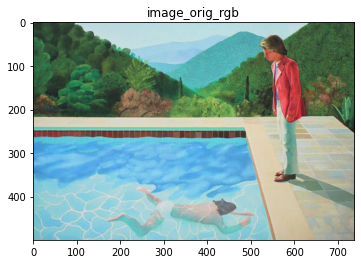

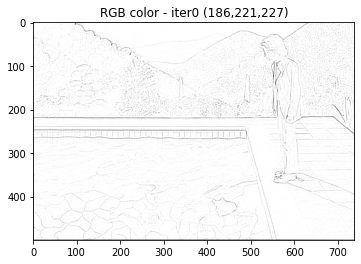

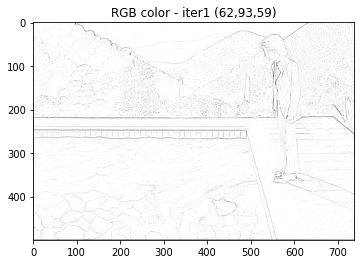

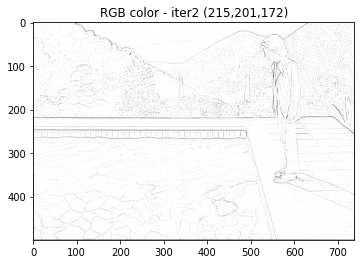

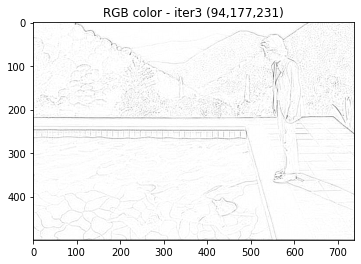

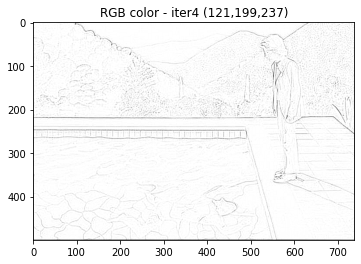

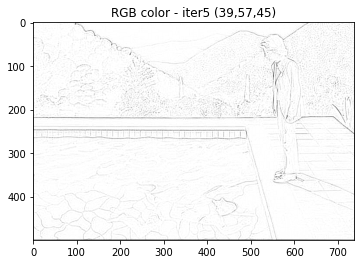

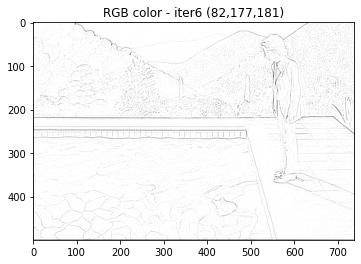

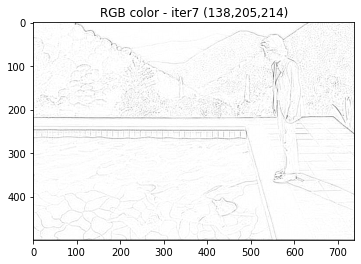

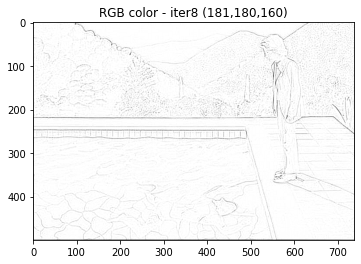

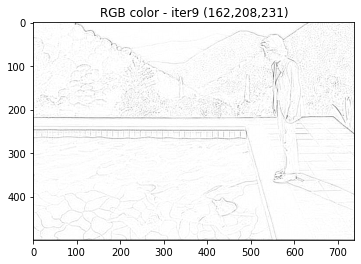

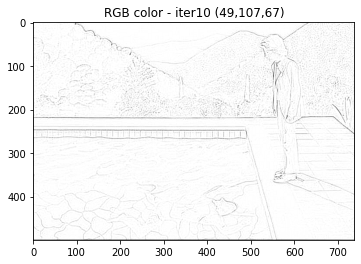

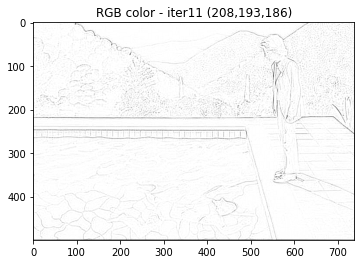

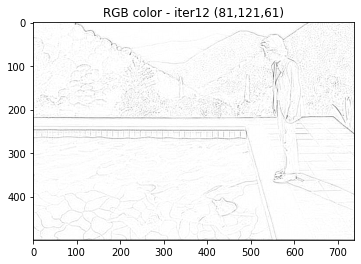

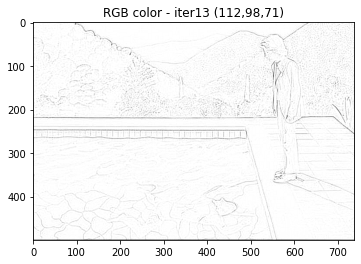

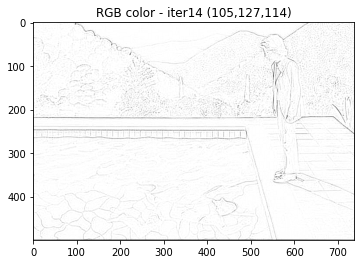

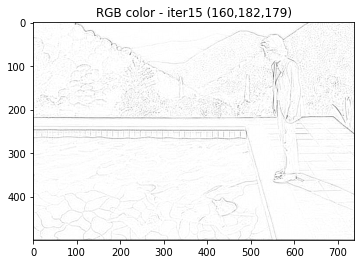

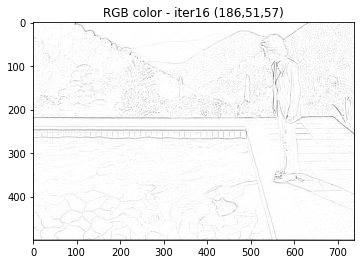

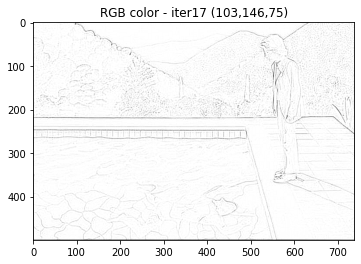

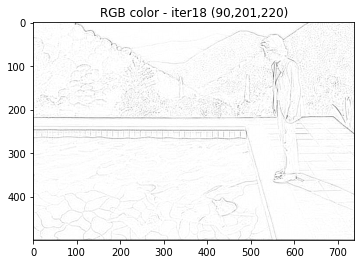

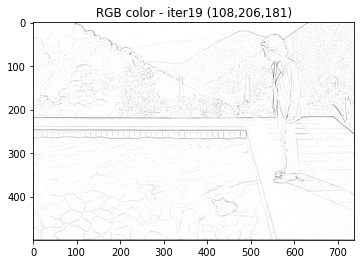

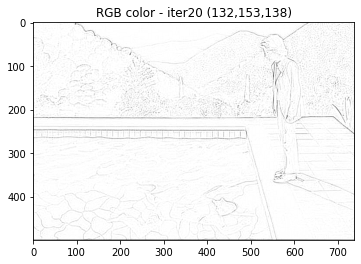

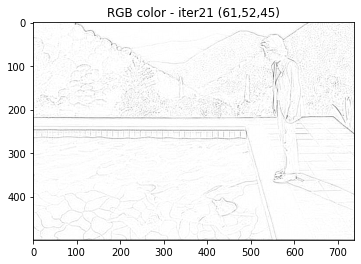

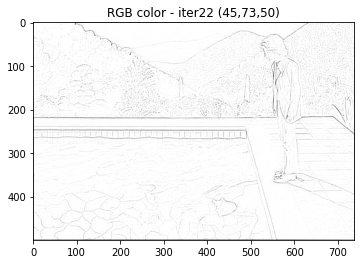

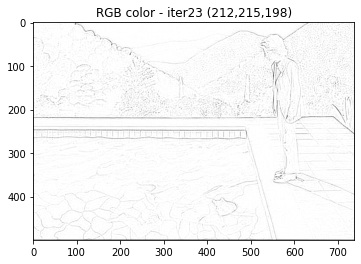

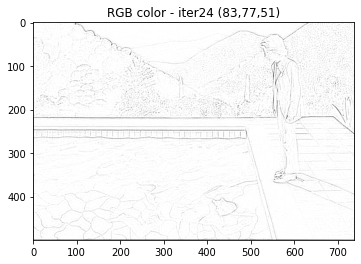

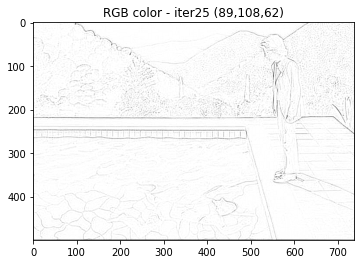

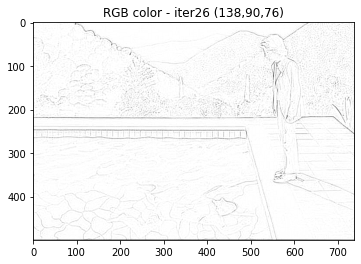

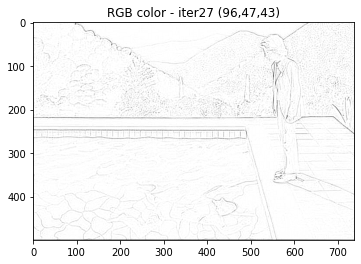

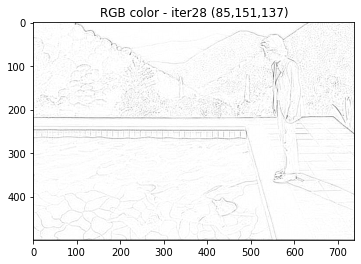

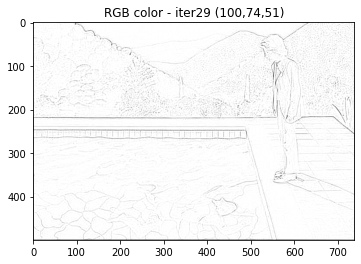

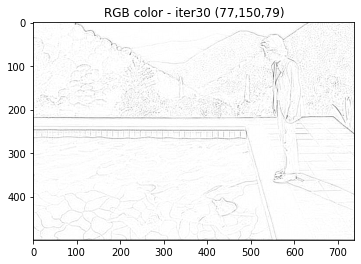

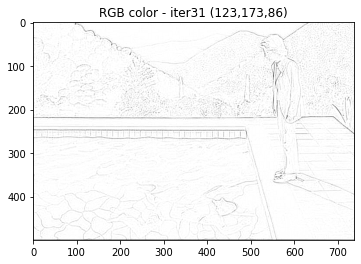

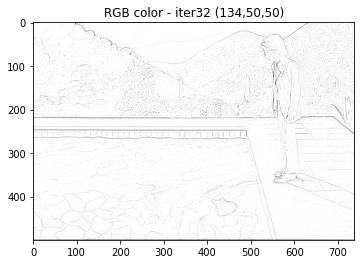

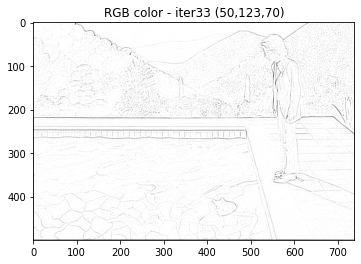

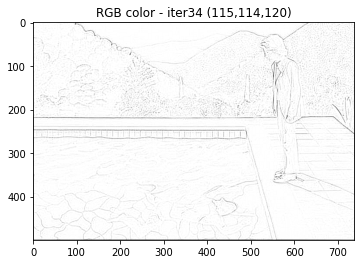

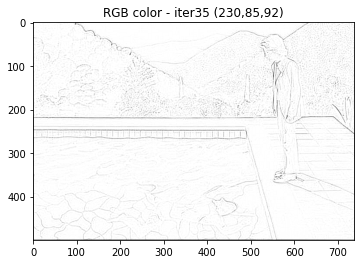

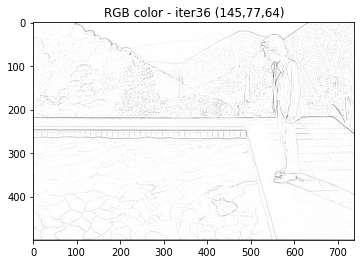

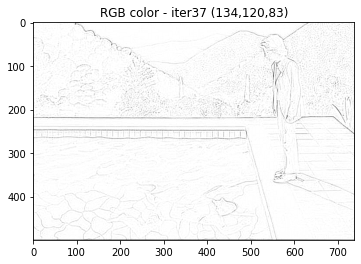

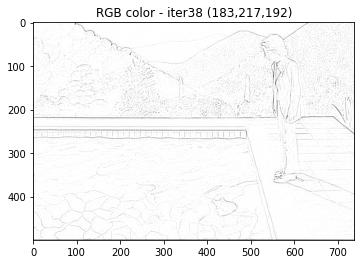

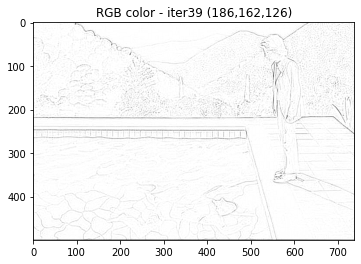

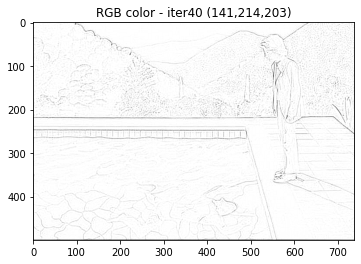

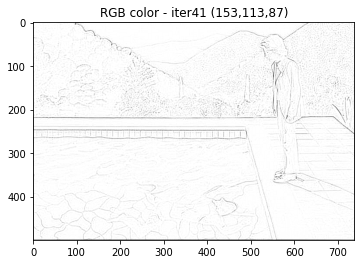

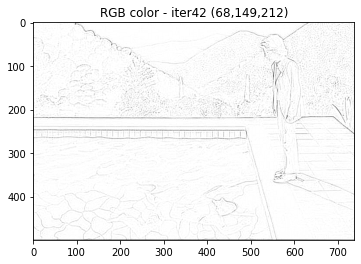

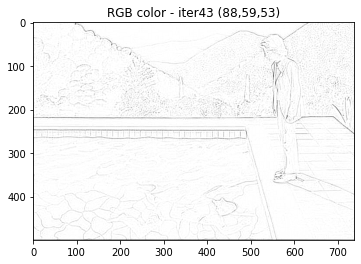

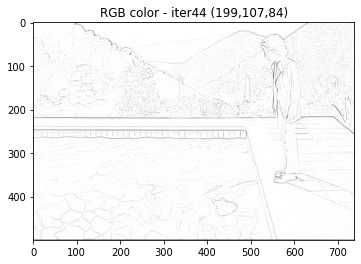

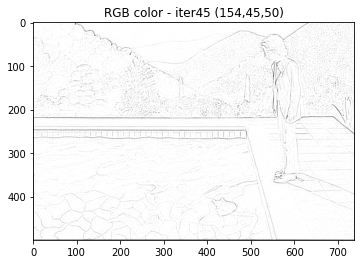

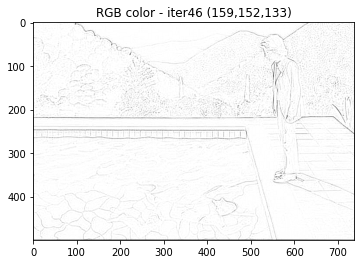

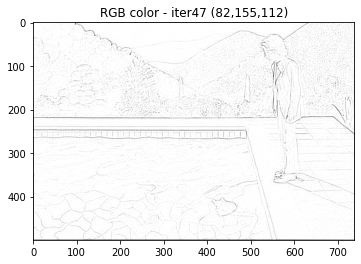

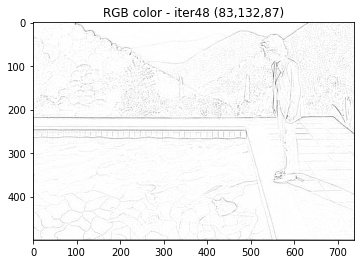

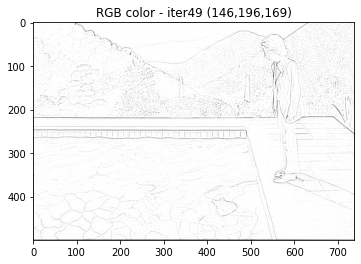

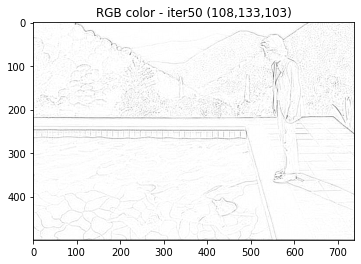

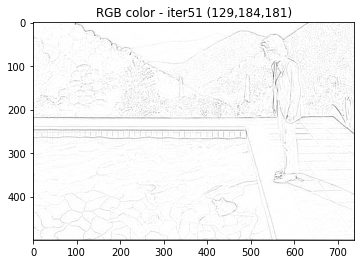

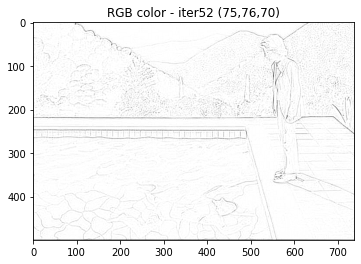

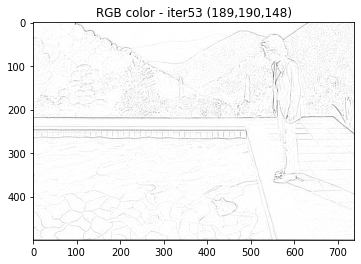

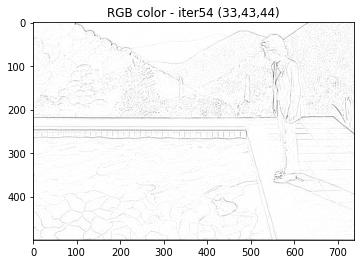

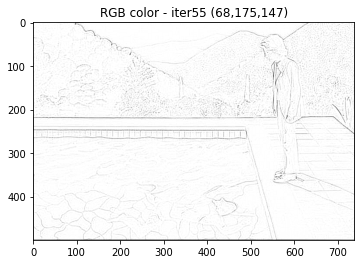

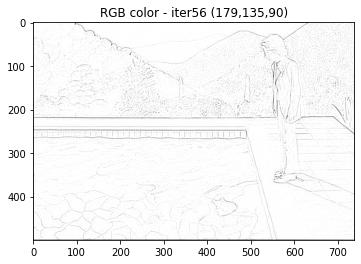

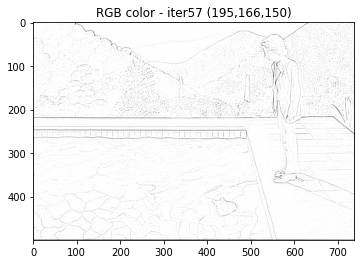

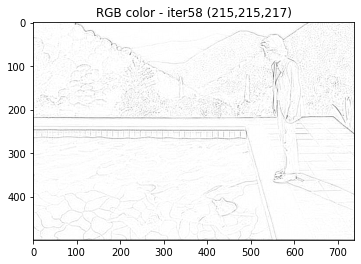

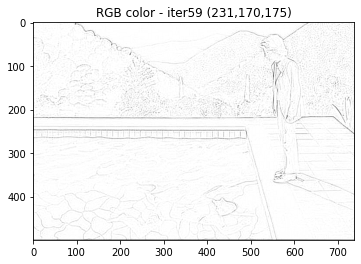

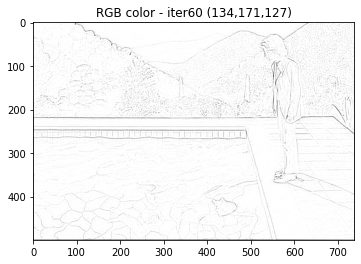

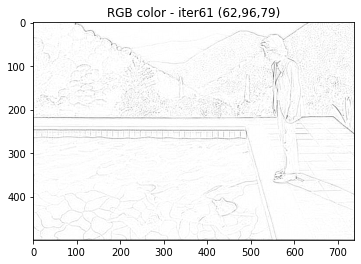

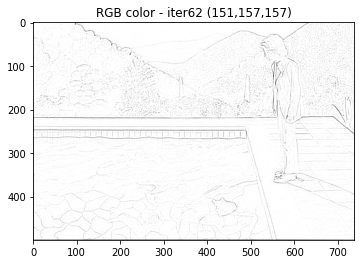

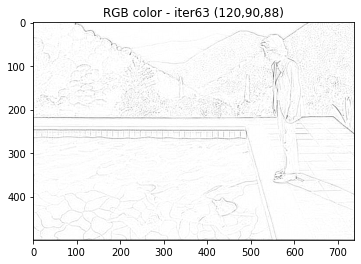

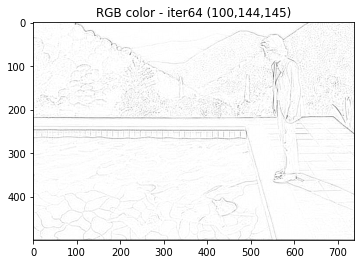

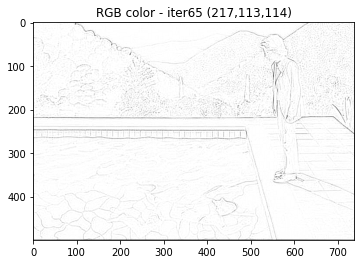

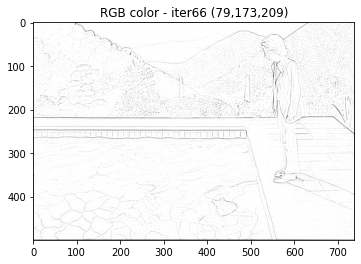

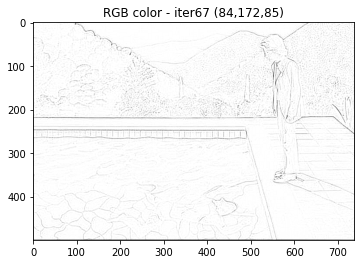

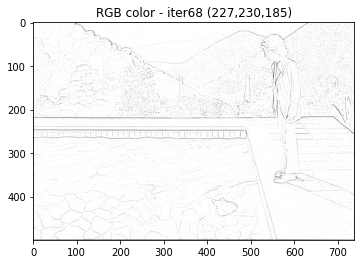

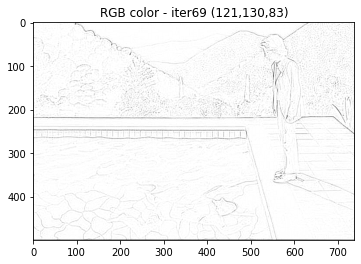

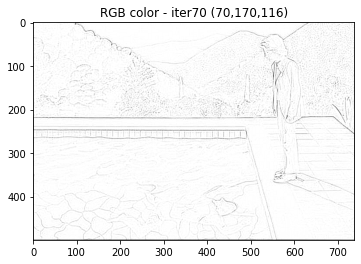

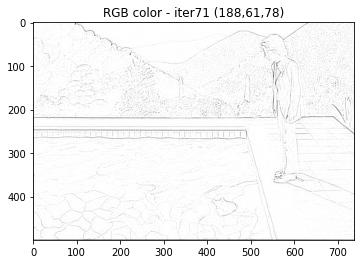

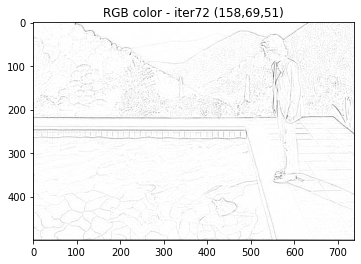

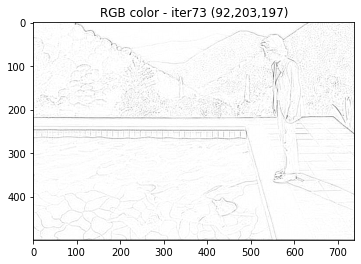

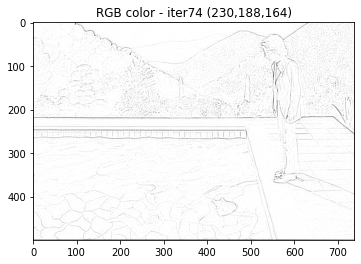

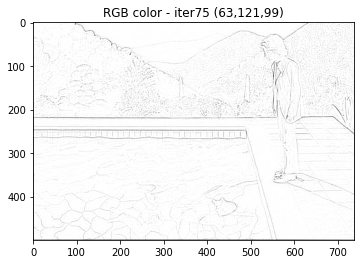

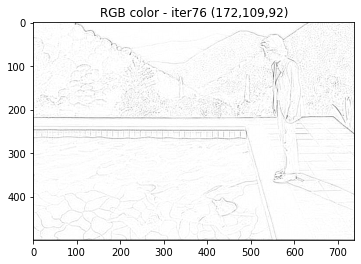

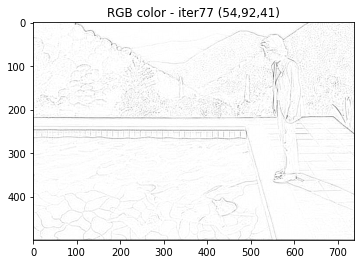

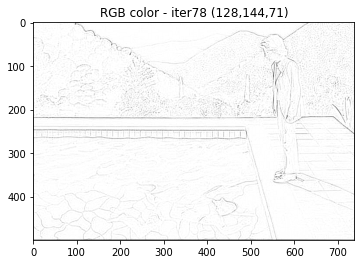

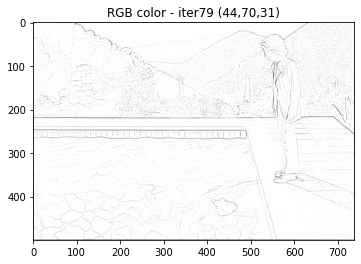

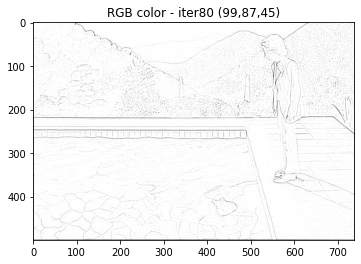

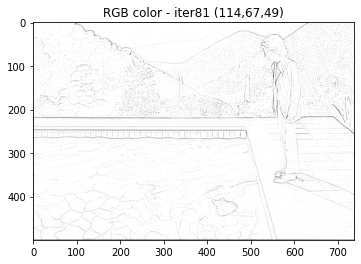

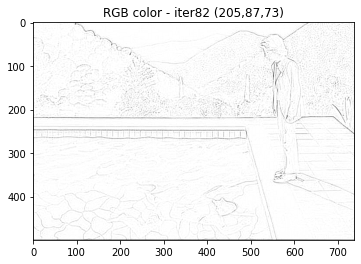

In [20]:
path="./data/tmp/"
nameInFile="tmp_resize_image.jpg"
nameOutContFile="resize_tmp_file_countours.jpg"

df_colours_s=df_colours_min100
range_c=20


image = cv2.imread(path + nameInFile)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title("image_orig_rgb")
plt.show()
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2] 


for k in range(min(len(df_colours_s),100)): #len(df_colours)
    image_rgb=image.copy()
    red_c, green_c, blue_c =df_colours_s.R.iloc[k],df_colours_s.G.iloc[k],df_colours_s.B.iloc[k]

    mask_c = (red >= max(red_c -range_c,0)) &  (red <= min(red_c +range_c,255))  &  \
    (green >= max(green_c -range_c,0))  & (green <= min(green_c +range_c,255))  &  \
            (blue >= max(blue_c -range_c,0))&  (blue <= min(blue_c +range_c,255))
    
    mask_else= ~mask_c
    image_rgb[:,:,:3][mask_c]=[red_c,green_c,blue_c]
    image_rgb[:,:,:3][mask_else]=[255,255,255]

    
    plt.imshow(image_rgb)
    #plt.imshow(pil_img_lines, cmap='gray')
    title_graph="RGB color - iter" + str(k) + ' (' + str(red_c) + ',' + str(green_c) + ',' + str(blue_c)+ ')'
    plt.title(title_graph)
    plt.show()